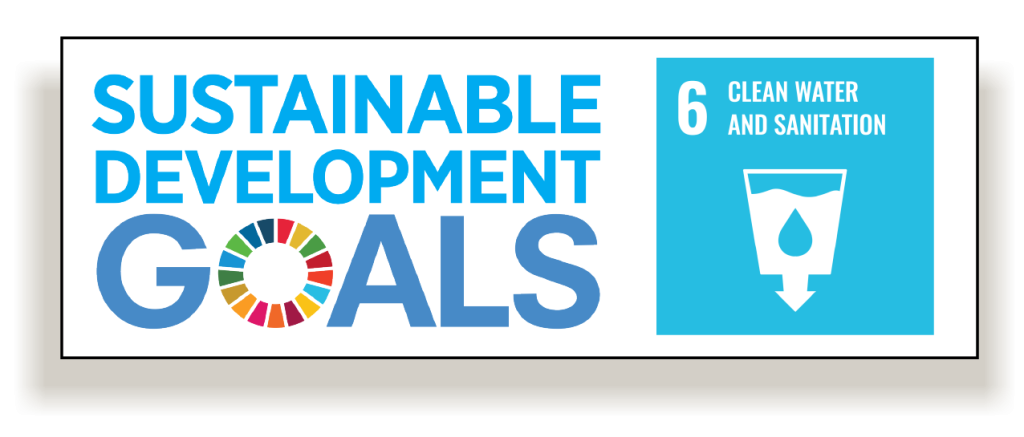

# ***Predicting Water Quality Using Machine Learning***

Group (8) members:

1.   One -
2.   two
3.  Bacoro dit Elhadji Lansar





# Introduction:

Water quality is essential for human health and the environment. Ensuring access to clean water and sanitation is a critical goal outlined in the United Nations Sustainable Development Goal (SDG) 6.
In this project, we aim to develop a machine learning model that predicts water quality based on various parameters.
By accurately predicting water quality, we can take proactive measures to address potential issues, thus contributing to the global effort of providing clean water and sanitation for all.

# Dataset:

## A brief description

We are utilizing a dataset from Kaggle, which includes various water quality measurements and assessments related to potability, indicating the suitability of water for human consumption. The dataset's main purpose is to provide insights into different water quality parameters and help determine whether the water is safe to drink. Each entry in the dataset represents a water sample with specific attributes, and the "Potability" column signifies if the water is suitable for consumption.

## Dataset source

Kaggle
[Click here](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability)


## key features and their descriptions.

**Columns:**

* **pH:** The pH level of the water.
* **Hardness:** Water hardness, a measure of mineral content.
* **Solids:** Total dissolved solids in the water.
* **Chloramines:** Chloramines concentration in the water.
* **Sulfate:** Sulfate concentration in the water.
* **Conductivity:** Electrical conductivity of the water.
* **Organic_carbon:** Organic carbon content in the water.
* **Trihalomethanes:** Trihalomethanes concentration in the water.
* **Turbidity:** Turbidity level, a measure of water clarity.
* **Potability:** Target variable; indicates water potability with values 1 (potable) and 0 (not potable).

# Methodology:

## Uploading data

In [1]:
# Checks if the CSV file exist
from google.colab import files
import os
if not os.path.exists('water_potability.csv'):
  uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

## Read the data

In [2]:

# For data handling we'll import pandas and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('water_potability.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Exploration and Understanding

In [3]:
df.shape

(3276, 10)

In [4]:
df.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Detect and remove outliers

In [6]:
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

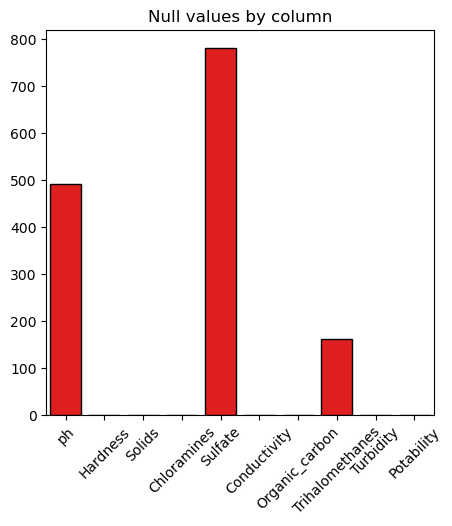

In [7]:
# Check ISNA sum
isna_sum = df.isna().sum()
plt.figure(figsize=(5, 5))
sns.barplot(x=isna_sum.index, y=isna_sum.values, color='red', edgecolor='black')
plt.title('Null values by column')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Calculate the mean of specific fields
mean_ph = df['ph'].mean()
mean_sulfate = df['Sulfate'].mean()
mean_trihalomethanes = df['Trihalomethanes'].mean()

# Print the results
print(f'Mean pH: {mean_ph:.2f}')
print(f'Mean Sulfate: {mean_sulfate:.2f}')
print(f'Mean Trihalomethanes: {mean_trihalomethanes:.2f}')

Mean pH: 7.08
Mean Sulfate: 333.78
Mean Trihalomethanes: 66.40


In [9]:
# Fill missing values with the calculated mean values
df['ph'].fillna(mean_ph, inplace=True)
df['Sulfate'].fillna(mean_sulfate, inplace=True)
df['Trihalomethanes'].fillna(mean_trihalomethanes, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
 #  remove the outliters from data set
def remove_outliers(df):
   q1= df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR= q3-q1
   upper_limit= q1 +(1.5*IQR)
   lower_limit=q1-(1.5*IQR)
   # define a
   ls=((df< lower_limit)|(df>upper_limit))
   return df[ls]


df_no_outliters= remove_outliers( df)

# display the first few rows of data set afterremove outkiers
print("\n Data after removing outliers:\n ",df.head())


 Data after removing outliers:
           ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


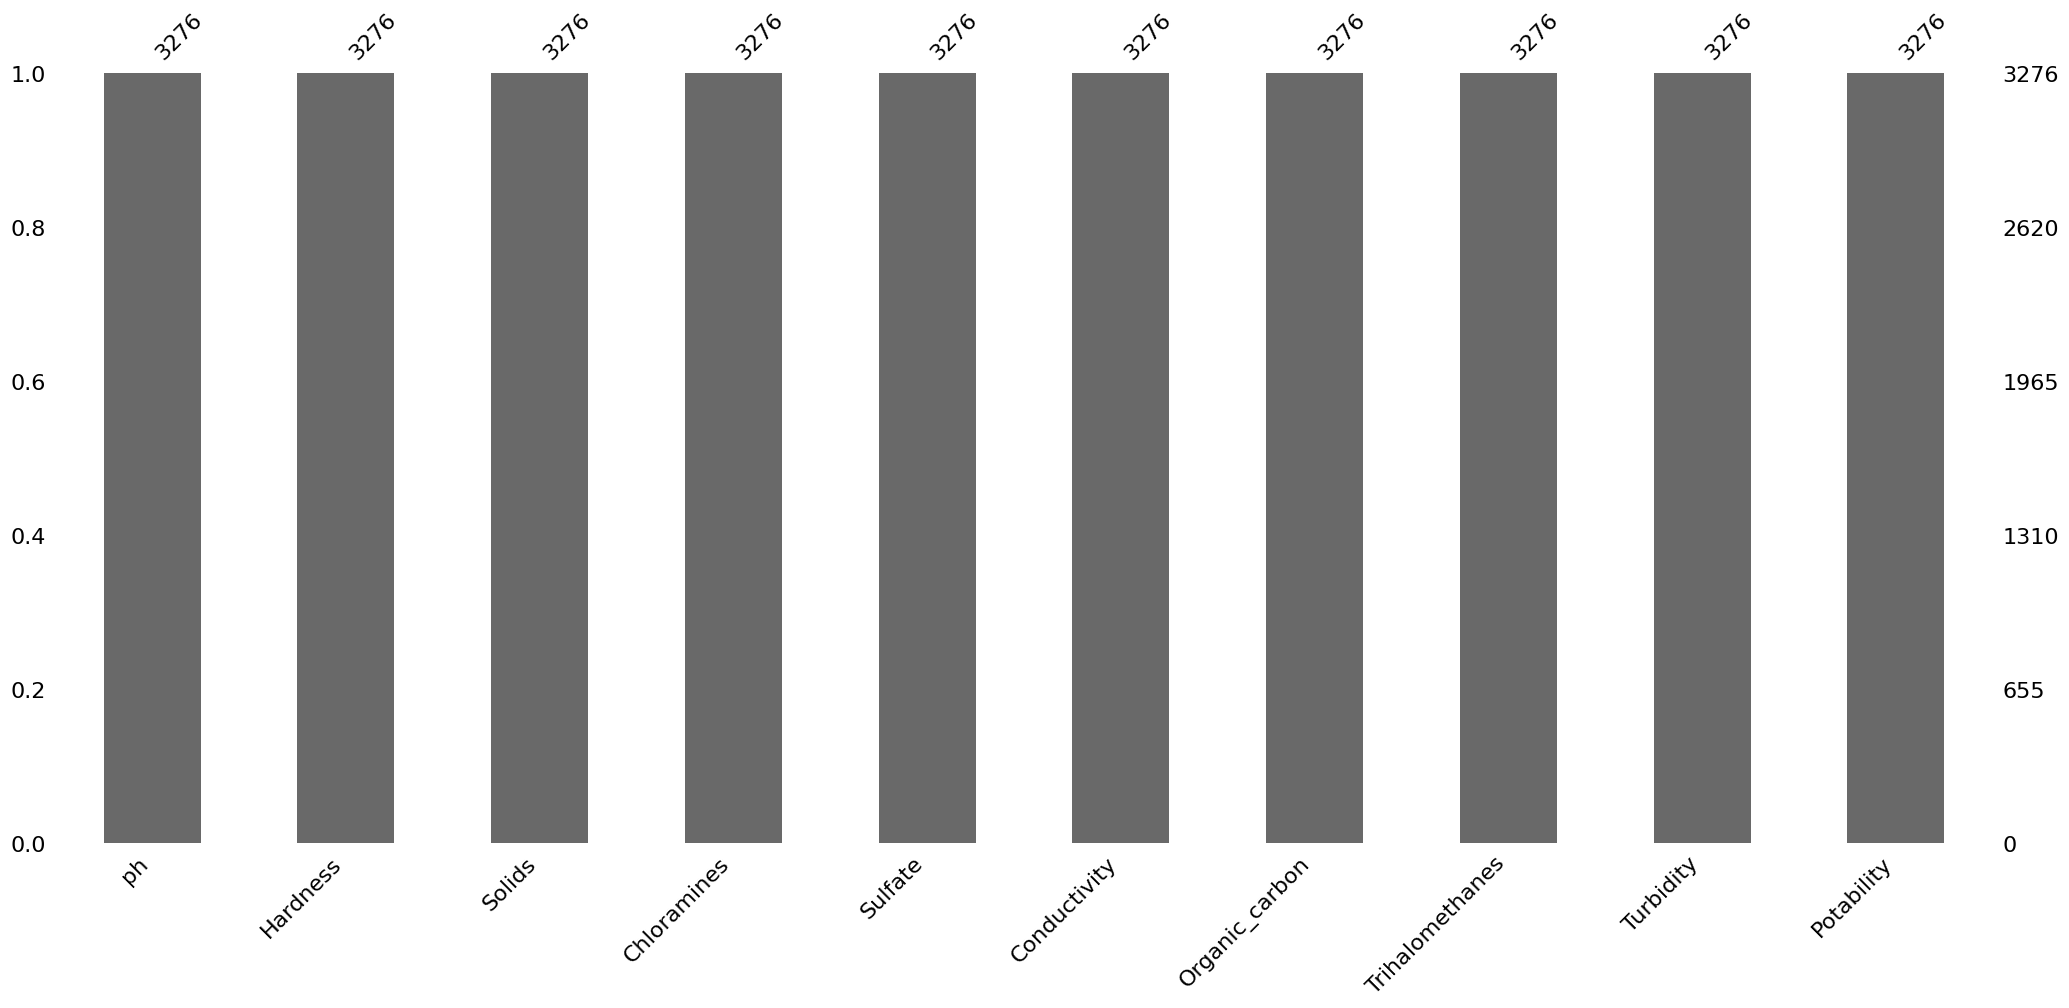

In [ ]:
#Visualise missing values
import matplotlib.pyplot as plt
import missingno as msno
msno.bar(df)
plt.show()

Fill null cell by Knearset neighbors

**Exploratory Data Analysis (EDA)**
Visualize the data to identify patterns and correlations.
Use plots and graphs to understand the distribution of each feature.

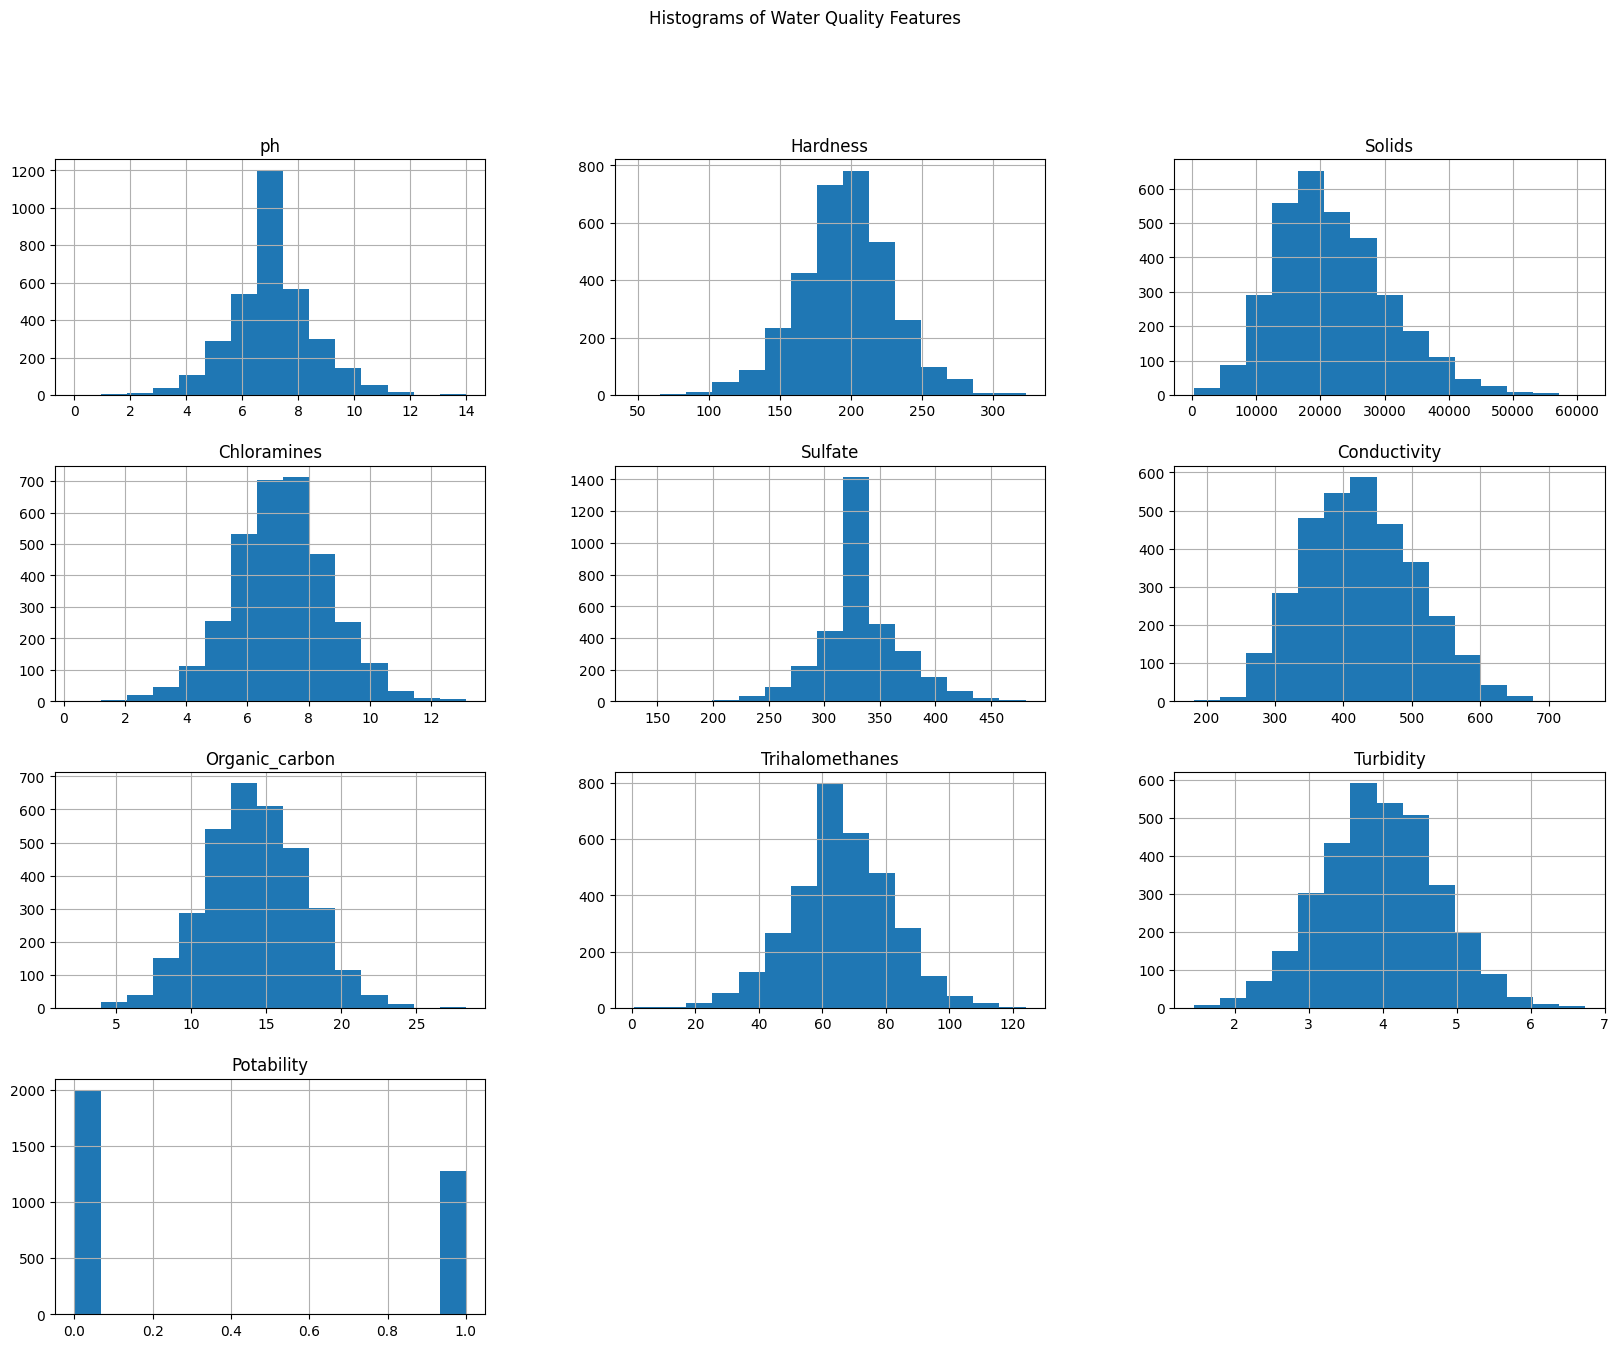

In [ ]:
df.hist(bins=15, figsize=(20, 15))
plt.suptitle('Histograms of Water Quality Features')
plt.show()


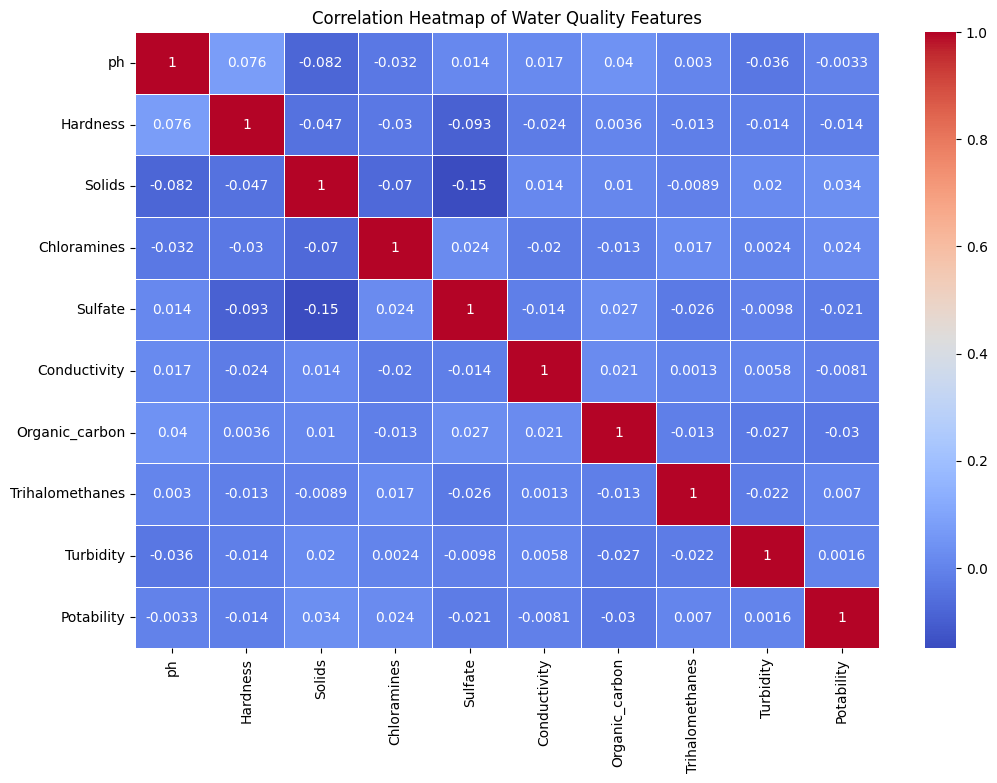

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Water Quality Features')
plt.show()


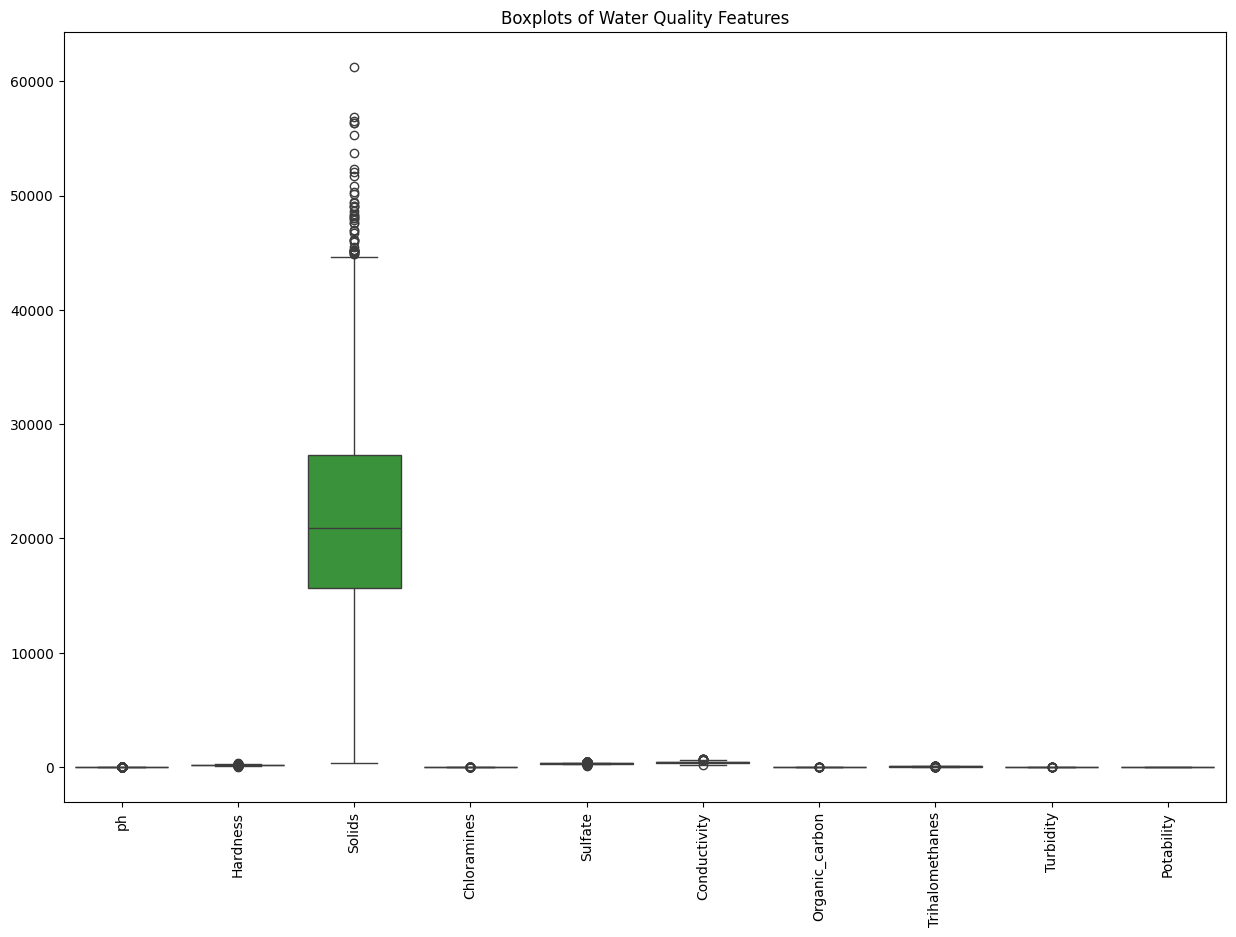

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplots of Water Quality Features')
plt.xticks(rotation=90)
plt.show()


**Model Selection**


Since our target variable is binary (potable vs. not potable), classification algorithms are appropriate.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pickle
from sklearn.model_selection import GridSearchCV

# Prepare data
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')

import pickle

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
# make prediction
y_pred = best_model.predict(X_test)
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


Accuracy: 0.6692073170731707
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.60      0.34      0.43       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.65      0.67      0.64       656

[[357  55]
 [162  82]]
ROC AUC: 0.6012852140697119


In [13]:
# Using GridSearchCV for Random Forest:

from sklearn.model_selection import GridSearchCV
import pickle

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
# make prediction
y_pred = best_model.predict(X_test)



In [ ]:
# Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.676829268292683
Precision: 0.6159420289855072
Recall: 0.3483606557377049
F1 Score: 0.44502617801047123
ROC AUC: 0.6098599395193379


[[363  49]
 [157  87]]


Text(0.5, 1.0, 'Truth and Prediction Matrix')

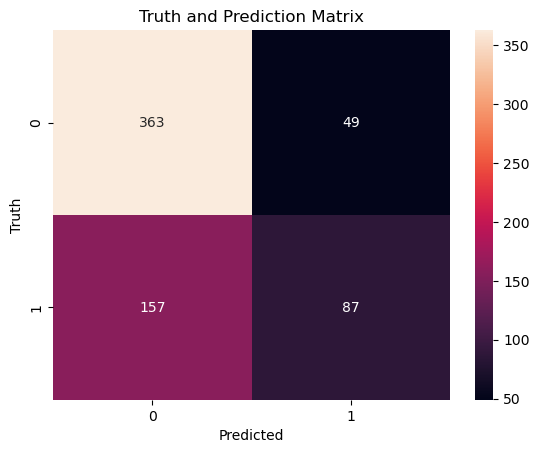

In [17]:
# Plot confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Truth and Prediction Matrix")

In [22]:
# pieChartPlotter(df, 'Potability') 
# dataset = prep.skewcorrect(dataset,except_columns=['Potability'])
# Calculate skewness for each column
skewness = df.skew()

# Print the skewness
print("Skewness of each columns in the dataset")
print(skewness)

Skewness of each columns in the dataset
ph                 0.027796
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         0.450784
dtype: float64


In [25]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook



import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



# Prepare features (X) and target (y)
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the results
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {mean_cv_score:.2f}')
print(f'Standard deviation of cross-validation scores: {std_cv_score:.2f}')


Cross-validation scores: [0.62042683 0.65343511 0.6519084  0.60458015 0.68396947]
Mean cross-validation score: 0.64
Standard deviation of cross-validation scores: 0.03


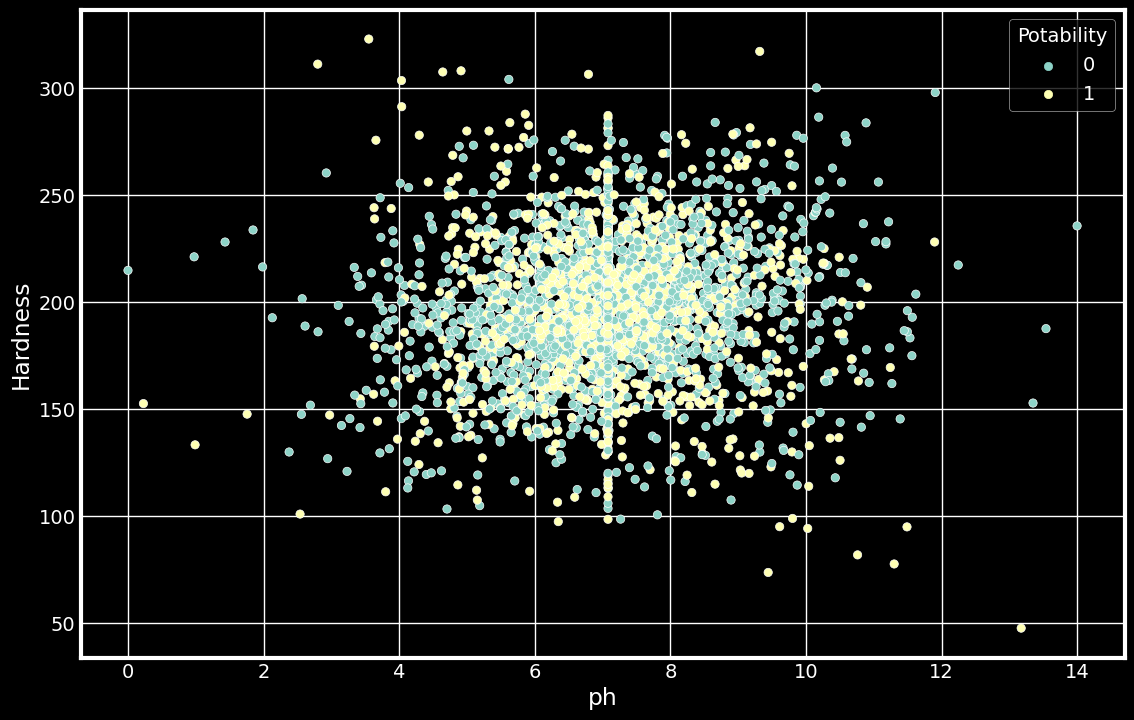

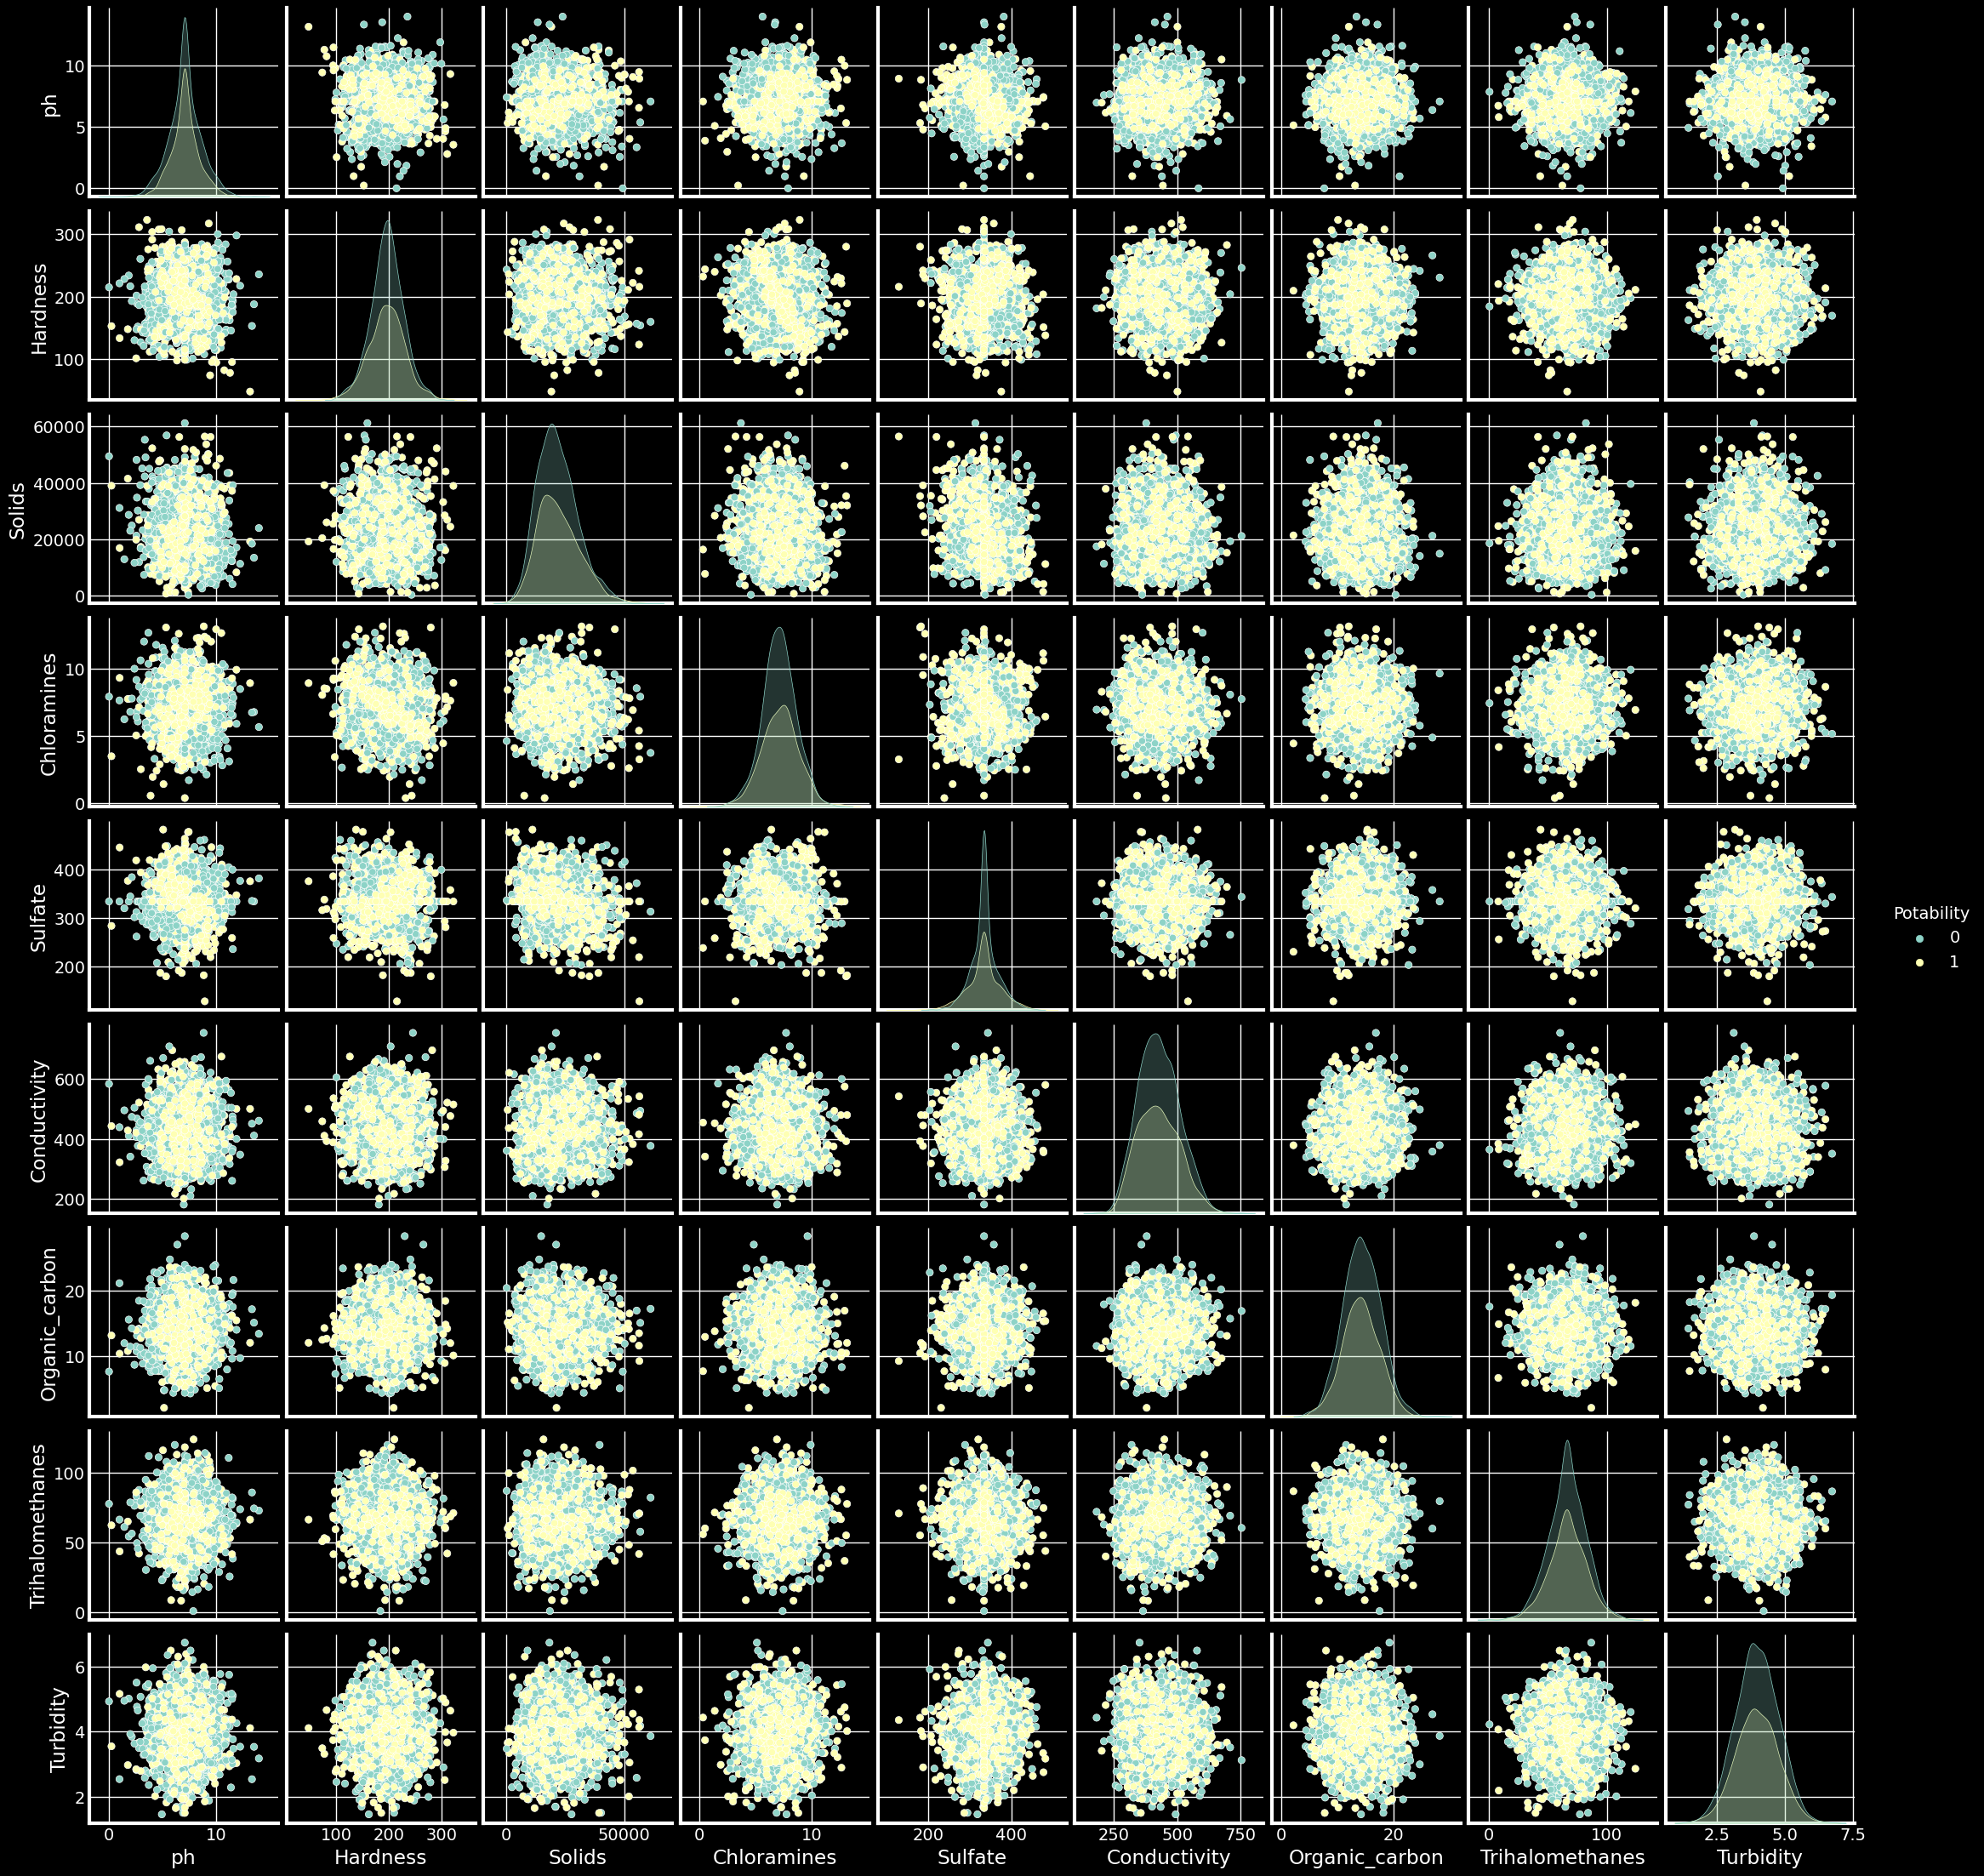

In [28]:
# Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='ph', y='Hardness', hue='Potability')
plt.show()

# Pair Plot
sns.pairplot(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']], hue='Potability')
plt.show()


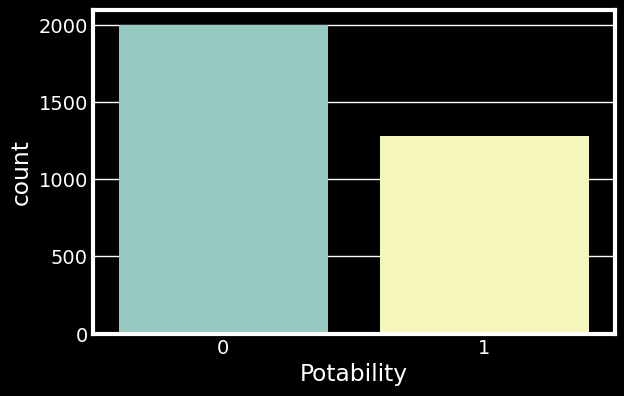

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Potability')
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Creating new features
df['Solids_log'] = df['Solids'].apply(lambda x: np.log(x + 1))

# Transforming existing features
df['Sulfate_binned'] = pd.cut(df['Sulfate'], bins=[0, 100, 200, 300, 400], labels=['Low', 'Medium', 'High', 'Very High'])

# Separating features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

# Encoding categorical variables
categorical_features = ['Sulfate_binned']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.6844512195121951
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       412
           1       0.65      0.32      0.43       244

    accuracy                           0.68       656
   macro avg       0.67      0.61      0.61       656
weighted avg       0.68      0.68      0.65       656



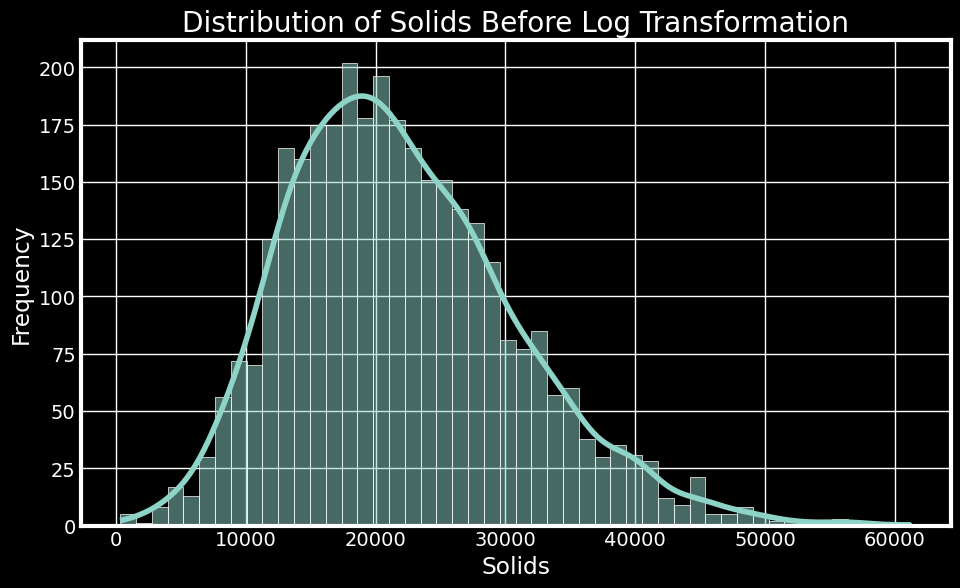

In [34]:
# Visualize the distribution of 'Solids' before log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Solids'], bins=50, kde=True)
plt.title('Distribution of Solids Before Log Transformation')
plt.xlabel('Solids')
plt.ylabel('Frequency')
plt.show()

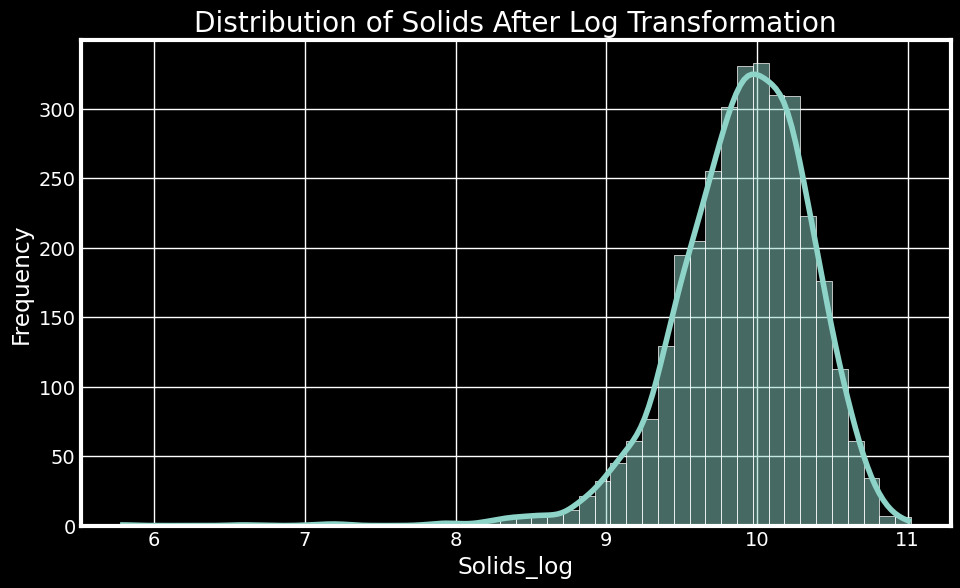

In [36]:
# Visualize the distribution of 'Solids_log' after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(df['Solids_log'], bins=50, kde=True)
plt.title('Distribution of Solids After Log Transformation')
plt.xlabel('Solids_log')
plt.ylabel('Frequency')
plt.show()